Notebook to write the code to calculate steady-states for the polymerase-cycle model with either more than 3 states in the cycle, or more than one TF, using the SVD instead of the MTT.

In [2]:
import numpy as np
import sys, os,re
path_to_eigen="/Users/rosamartinezcorral/Documents/eigen-3.4.0"
path_to_utilssynpy="../scriptssyn/"
sys.path.append(path_to_utilssynpy)
import write_multiplebsites #in this case the usage of spanning trees becomes impractical. Therefore, in this code, standard routines to compute the matrix nullspace are used


Note that here the calculation uses the SVD, so the same method can be used for any number of states (as the number of states increases, the spanning trees increase as well...)

In [2]:
#1 site, 3 states, 1 rev. The original one. Same as one written in the notebook using MTT, so we can doublecheck code
bsites=1
nnodes_cycle=3
TFnames=["A"]
rev_cycle=[1]
prec=50
pars,nnodes,L_string,L_string_new,node_indices,transitions,alledges=write_multiplebsites.get_edges_anysites_anyTFs(sites=bsites,nnodes_cycle=nnodes_cycle,rev_cycle=rev_cycle,TFnames=TFnames)

fname="./bin/bPcycle_%dbs_%dstates_rev%s_%s_prec%d.cpp"%(bsites,nnodes_cycle,"_".join(map(str,rev_cycle)),"_".join(TFnames),prec)

file=fname
objectnamemac=fname.replace(".cpp","")
write_multiplebsites.write_pybind_module_highprecision(fname,pars,nnodes,TFnames,L_string_new,bsites,indicesC=node_indices,coeffsC=transitions,precision=prec)

#compilestringmac="c++ -O2 -DNDEBUG -Wall -shared -std=c++11  -fPIC -undefined dynamic_lookup -I  %s -lmpfr -lmpc `python3 -m pybind11 --includes` %s -o %s`python3-config --extension-suffix`"%(path_to_eigen, file,objectnamemac)
compilestringmac="c++ -O2 -DNDEBUG -Wall -shared -std=c++11  -fPIC -undefined dynamic_lookup -I %s -I /opt/homebrew/include -L /opt/homebrew/lib -lmpfr -lmpc `python3 -m pybind11 --includes` %s -o %s`python3-config --extension-suffix`"%(path_to_eigen,file,objectnamemac)


!$compilestringmac

binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'kr_1_0', 1], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'kr_1_1', 2], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'b1_1_3', 5], [6, 'k_3_1', 2]]
number of nodes: 6
[5, 'k_3_0', 1]
[6, 'k_3_1', 2]
[4, 5]
[6, 13]
In file included from ./bin/bPcycle_1bs_3states_rev1_A_prec50.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)"
      ^
In file included from ./bin/bPcycle_1bs_3states_rev1_A_prec50.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr

6 warnings generated.


Note that the node indexing is 1: no-bound,state0, 2: bound, state0, 3: no-bound,state1, 4: bound, state1...
Note also that the parameter order is a bit weird. Check c code.

In [3]:
#compare to code that uses the MTT. both codes should give the same result
sys.path.append("./bin")
import PolA_A_allpars 
import bPcycle_1bs_3states_rev1_A_prec50 as Ccode_prec 

Ccode=PolA_A_allpars.GRFCalculations_50_50_15()


In [4]:
ktia0=1
ktan0=5
ktin0=100
ktni0=10
ktiaA=3.5
ktanA=10
ktinA=100
ktniA=7

kb=1
ku=10
parvalues_1=np.array([ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA,kb,ku,kb,ku,kb,ku])
parvalues_2=np.array([kb,ktni0,ktin0,kb,ktia0,kb,ktan0,ku,ktniA,ktinA,ku,ktiaA,ku,ktanA])
Ccode.fill_num_den(parvalues_1,np.array([0]))
ss1=Ccode.interfaceGRF(7)
print(ss1) #
ss2=Ccode_prec.interfacess(parvalues_2,np.array([7]))
print(ss2)

0.1434760294380496
0.14347602943804963


As expected, both codes give the same result. 
Get code for 3,4,5 states, with various reversibility patterns and precisions:

In [7]:
#note that in fact neither the polynomials code nor the utilsGRF code is needed. It is just in the compilation instruction because I copy-pasted it from another time.
for prec in [50,100]:
    bsites=1
    TFnames=["A"]
    combinations=[[3,[1]],[3,[2]],[3,[1,2]],[4,[1]],[4,[2]],[4,[3]],[4,[1,2]],[4,[1,3]],[4,[2,3]],[5,[1]],[5,[1,2]],[5,[1,2,3,4]]]
    for combi in combinations:
        nnodes_cycle, rev_cycle=combi
        fname="./bin/bPcycle_%dbs_%dstates_rev%s_TF%s_prec%d.cpp"%(bsites,nnodes_cycle,"u".join(map(str,rev_cycle)),"u".join(TFnames),prec)
        print("***",fname)
        file=fname
        print("nnodes_cycle:",nnodes_cycle)
        print(rev_cycle)
        pars,nnodes,L_string,L_string_new,node_indices,transitions,alledges=write_multiplebsites.get_edges_anysites_anyTFs(sites=bsites,nnodes_cycle=nnodes_cycle,rev_cycle=rev_cycle,TFnames=TFnames)
        objectnamemac=fname.replace(".cpp","")
        write_multiplebsites.write_pybind_module_highprecision(fname,pars,nnodes,TFnames,L_string_new,bsites,indicesC=node_indices,coeffsC=transitions,precision=50)

        compilestringmac="c++ -O2 -DNDEBUG -Wall -shared -std=c++11  -fPIC -undefined dynamic_lookup -I %s -I /opt/homebrew/include -L /opt/homebrew/lib -lmpfr -lmpc `python3 -m pybind11 --includes` %s -o %s`python3-config --extension-suffix`"%(path_to_eigen,file,objectnamemac)


        !$compilestringmac

*** ./bin/bPcycle_1bs_3states_rev1_TFA_prec50.cpp
nnodes_cycle: 3
[1]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'kr_1_0', 1], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'kr_1_1', 2], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'b1_1_3', 5], [6, 'k_3_1', 2]]
number of nodes: 6
[5, 'k_3_0', 1]
[6, 'k_3_1', 2]
[4, 5]
[6, 13]
In file included from ./bin/bPcycle_1bs_3states_rev1_TFA_prec50.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)"
      ^
In file included from ./bin/bPcycle_1bs_3states_rev1_TFA_prec50.cp

6 warnings generated.
*** ./bin/bPcycle_1bs_3states_rev2_TFA_prec50.cpp
nnodes_cycle: 3
[2]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'kr_2_0', 3], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'kr_2_1', 4], [6, 'b1_1_3', 5], [6, 'k_3_1', 2]]
number of nodes: 6
[5, 'k_3_0', 1]
[6, 'k_3_1', 2]
[4, 5]
[6, 13]
In file included from ./bin/bPcycle_1bs_3states_rev2_TFA_prec50.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)"
      ^
In file included from ./bin/bPcycle_1bs_3sta

6 warnings generated.
*** ./bin/bPcycle_1bs_3states_rev1u2_TFA_prec50.cpp
nnodes_cycle: 3
[1, 2]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'kr_1_0', 1], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'kr_2_0', 3], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'kr_1_1', 2], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'kr_2_1', 4], [6, 'b1_1_3', 5], [6, 'k_3_1', 2]]
number of nodes: 6
[5, 'k_3_0', 1]
[6, 'k_3_1', 2]
[4, 5]
[7, 15]
In file included from ./bin/bPcycle_1bs_3states_rev1u2_TFA_prec50.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)"
      ^
I

6 warnings generated.
*** ./bin/bPcycle_1bs_4states_rev1_TFA_prec50.cpp
nnodes_cycle: 4
[1]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'kr_1_0', 1], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 7], [7, 'a1_0_4-A', 8], [7, 'k_4_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'kr_1_1', 2], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'b1_1_3', 5], [6, 'k_3_1', 8], [8, 'b1_1_4', 7], [8, 'k_4_1', 2]]
number of nodes: 8
[7, 'k_4_0', 1]
[8, 'k_4_1', 2]
[6, 7]
[8, 17]
In file included from ./bin/bPcycle_1bs_4states_rev1_TFA_prec50.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (B

6 warnings generated.
*** ./bin/bPcycle_1bs_4states_rev2_TFA_prec50.cpp
nnodes_cycle: 4
[2]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'kr_2_0', 3], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 7], [7, 'a1_0_4-A', 8], [7, 'k_4_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'kr_2_1', 4], [6, 'b1_1_3', 5], [6, 'k_3_1', 8], [8, 'b1_1_4', 7], [8, 'k_4_1', 2]]
number of nodes: 8
[7, 'k_4_0', 1]
[8, 'k_4_1', 2]
[6, 7]
[8, 17]
In file included from ./bin/bPcycle_1bs_4states_rev2_TFA_prec50.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (B

6 warnings generated.
*** ./bin/bPcycle_1bs_4states_rev3_TFA_prec50.cpp
nnodes_cycle: 4
[3]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 7], [7, 'kr_3_0', 5], [7, 'a1_0_4-A', 8], [7, 'k_4_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'b1_1_3', 5], [6, 'k_3_1', 8], [8, 'kr_3_1', 6], [8, 'b1_1_4', 7], [8, 'k_4_1', 2]]
number of nodes: 8
[7, 'k_4_0', 1]
[8, 'k_4_1', 2]
[6, 7]
[8, 17]
In file included from ./bin/bPcycle_1bs_4states_rev3_TFA_prec50.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (B

6 warnings generated.
*** ./bin/bPcycle_1bs_4states_rev1u2_TFA_prec50.cpp
nnodes_cycle: 4
[1, 2]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'kr_1_0', 1], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'kr_2_0', 3], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 7], [7, 'a1_0_4-A', 8], [7, 'k_4_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'kr_1_1', 2], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'kr_2_1', 4], [6, 'b1_1_3', 5], [6, 'k_3_1', 8], [8, 'b1_1_4', 7], [8, 'k_4_1', 2]]
number of nodes: 8
[7, 'k_4_0', 1]
[8, 'k_4_1', 2]
[6, 7]
[9, 19]
In file included from ./bin/bPcycle_1bs_4states_rev1u2_TFA_prec50.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The minimum language standard to use Boost.

6 warnings generated.
*** ./bin/bPcycle_1bs_4states_rev1u3_TFA_prec50.cpp
nnodes_cycle: 4
[1, 3]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'kr_1_0', 1], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 7], [7, 'kr_3_0', 5], [7, 'a1_0_4-A', 8], [7, 'k_4_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'kr_1_1', 2], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'b1_1_3', 5], [6, 'k_3_1', 8], [8, 'kr_3_1', 6], [8, 'b1_1_4', 7], [8, 'k_4_1', 2]]
number of nodes: 8
[7, 'k_4_0', 1]
[8, 'k_4_1', 2]
[6, 7]
[9, 19]
In file included from ./bin/bPcycle_1bs_4states_rev1u3_TFA_prec50.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The minimum language standard to use Boost.

6 warnings generated.
*** ./bin/bPcycle_1bs_4states_rev2u3_TFA_prec50.cpp
nnodes_cycle: 4
[2, 3]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'kr_2_0', 3], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 7], [7, 'kr_3_0', 5], [7, 'a1_0_4-A', 8], [7, 'k_4_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'kr_2_1', 4], [6, 'b1_1_3', 5], [6, 'k_3_1', 8], [8, 'kr_3_1', 6], [8, 'b1_1_4', 7], [8, 'k_4_1', 2]]
number of nodes: 8
[7, 'k_4_0', 1]
[8, 'k_4_1', 2]
[6, 7]
[9, 19]
In file included from ./bin/bPcycle_1bs_4states_rev2u3_TFA_prec50.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The minimum language standard to use Boost.

6 warnings generated.
*** ./bin/bPcycle_1bs_5states_rev1_TFA_prec50.cpp
nnodes_cycle: 5
[1]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'kr_1_0', 1], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 7], [7, 'a1_0_4-A', 8], [7, 'k_4_0', 9], [9, 'a1_0_5-A', 10], [9, 'k_5_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'kr_1_1', 2], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'b1_1_3', 5], [6, 'k_3_1', 8], [8, 'b1_1_4', 7], [8, 'k_4_1', 10], [10, 'b1_1_5', 9], [10, 'k_5_1', 2]]
number of nodes: 10
[9, 'k_5_0', 1]
[10, 'k_5_1', 2]
[8, 9]
[10, 21]
In file included from ./bin/bPcycle_1bs_5states_rev1_TFA_prec50.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The min

6 warnings generated.
*** ./bin/bPcycle_1bs_5states_rev1u2_TFA_prec50.cpp
nnodes_cycle: 5
[1, 2]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'kr_1_0', 1], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'kr_2_0', 3], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 7], [7, 'a1_0_4-A', 8], [7, 'k_4_0', 9], [9, 'a1_0_5-A', 10], [9, 'k_5_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'kr_1_1', 2], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'kr_2_1', 4], [6, 'b1_1_3', 5], [6, 'k_3_1', 8], [8, 'b1_1_4', 7], [8, 'k_4_1', 10], [10, 'b1_1_5', 9], [10, 'k_5_1', 2]]
number of nodes: 10
[9, 'k_5_0', 1]
[10, 'k_5_1', 2]
[8, 9]
[11, 23]
In file included from ./bin/bPcycle_1bs_5states_rev1u2_TFA_prec50.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 rel

6 warnings generated.
*** ./bin/bPcycle_1bs_5states_rev1u2u3u4_TFA_prec50.cpp
nnodes_cycle: 5
[1, 2, 3, 4]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'kr_1_0', 1], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'kr_2_0', 3], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 7], [7, 'kr_3_0', 5], [7, 'a1_0_4-A', 8], [7, 'k_4_0', 9], [9, 'kr_4_0', 7], [9, 'a1_0_5-A', 10], [9, 'k_5_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'kr_1_1', 2], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'kr_2_1', 4], [6, 'b1_1_3', 5], [6, 'k_3_1', 8], [8, 'kr_3_1', 6], [8, 'b1_1_4', 7], [8, 'k_4_1', 10], [10, 'kr_4_1', 8], [10, 'b1_1_5', 9], [10, 'k_5_1', 2]]
number of nodes: 10
[9, 'k_5_0', 1]
[10, 'k_5_1', 2]
[8, 9]
[13, 27]
In file included from ./bin/bPcycle_1bs_5states_rev1u2u3u4_TFA_prec50.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum 

6 warnings generated.
*** ./bin/bPcycle_1bs_3states_rev1_TFA_prec100.cpp
nnodes_cycle: 3
[1]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'kr_1_0', 1], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'kr_1_1', 2], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'b1_1_3', 5], [6, 'k_3_1', 2]]
number of nodes: 6
[5, 'k_3_0', 1]
[6, 'k_3_1', 2]
[4, 5]
[6, 13]
In file included from ./bin/bPcycle_1bs_3states_rev1_TFA_prec100.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)"
      ^
In file included from ./bin/bPcycle_1bs_3s

6 warnings generated.
*** ./bin/bPcycle_1bs_3states_rev2_TFA_prec100.cpp
nnodes_cycle: 3
[2]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'kr_2_0', 3], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'kr_2_1', 4], [6, 'b1_1_3', 5], [6, 'k_3_1', 2]]
number of nodes: 6
[5, 'k_3_0', 1]
[6, 'k_3_1', 2]
[4, 5]
[6, 13]
In file included from ./bin/bPcycle_1bs_3states_rev2_TFA_prec100.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)"
      ^
In file included from ./bin/bPcycle_1bs_3s

6 warnings generated.
*** ./bin/bPcycle_1bs_3states_rev1u2_TFA_prec100.cpp
nnodes_cycle: 3
[1, 2]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'kr_1_0', 1], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'kr_2_0', 3], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'kr_1_1', 2], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'kr_2_1', 4], [6, 'b1_1_3', 5], [6, 'k_3_1', 2]]
number of nodes: 6
[5, 'k_3_0', 1]
[6, 'k_3_1', 2]
[4, 5]
[7, 15]
In file included from ./bin/bPcycle_1bs_3states_rev1u2_TFA_prec100.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)"
      ^

6 warnings generated.
*** ./bin/bPcycle_1bs_4states_rev1_TFA_prec100.cpp
nnodes_cycle: 4
[1]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'kr_1_0', 1], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 7], [7, 'a1_0_4-A', 8], [7, 'k_4_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'kr_1_1', 2], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'b1_1_3', 5], [6, 'k_3_1', 8], [8, 'b1_1_4', 7], [8, 'k_4_1', 2]]
number of nodes: 8
[7, 'k_4_0', 1]
[8, 'k_4_1', 2]
[6, 7]
[8, 17]
In file included from ./bin/bPcycle_1bs_4states_rev1_TFA_prec100.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 

6 warnings generated.
*** ./bin/bPcycle_1bs_4states_rev2_TFA_prec100.cpp
nnodes_cycle: 4
[2]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'kr_2_0', 3], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 7], [7, 'a1_0_4-A', 8], [7, 'k_4_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'kr_2_1', 4], [6, 'b1_1_3', 5], [6, 'k_3_1', 8], [8, 'b1_1_4', 7], [8, 'k_4_1', 2]]
number of nodes: 8
[7, 'k_4_0', 1]
[8, 'k_4_1', 2]
[6, 7]
[8, 17]
In file included from ./bin/bPcycle_1bs_4states_rev2_TFA_prec100.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 

6 warnings generated.
*** ./bin/bPcycle_1bs_4states_rev3_TFA_prec100.cpp
nnodes_cycle: 4
[3]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 7], [7, 'kr_3_0', 5], [7, 'a1_0_4-A', 8], [7, 'k_4_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'b1_1_3', 5], [6, 'k_3_1', 8], [8, 'kr_3_1', 6], [8, 'b1_1_4', 7], [8, 'k_4_1', 2]]
number of nodes: 8
[7, 'k_4_0', 1]
[8, 'k_4_1', 2]
[6, 7]
[8, 17]
In file included from ./bin/bPcycle_1bs_4states_rev3_TFA_prec100.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 

6 warnings generated.
*** ./bin/bPcycle_1bs_4states_rev1u2_TFA_prec100.cpp
nnodes_cycle: 4
[1, 2]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'kr_1_0', 1], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'kr_2_0', 3], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 7], [7, 'a1_0_4-A', 8], [7, 'k_4_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'kr_1_1', 2], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'kr_2_1', 4], [6, 'b1_1_3', 5], [6, 'k_3_1', 8], [8, 'b1_1_4', 7], [8, 'k_4_1', 2]]
number of nodes: 8
[7, 'k_4_0', 1]
[8, 'k_4_1', 2]
[6, 7]
[9, 19]
In file included from ./bin/bPcycle_1bs_4states_rev1u2_TFA_prec100.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The minimum language standard to use Boos

6 warnings generated.
*** ./bin/bPcycle_1bs_4states_rev1u3_TFA_prec100.cpp
nnodes_cycle: 4
[1, 3]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'kr_1_0', 1], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 7], [7, 'kr_3_0', 5], [7, 'a1_0_4-A', 8], [7, 'k_4_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'kr_1_1', 2], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'b1_1_3', 5], [6, 'k_3_1', 8], [8, 'kr_3_1', 6], [8, 'b1_1_4', 7], [8, 'k_4_1', 2]]
number of nodes: 8
[7, 'k_4_0', 1]
[8, 'k_4_1', 2]
[6, 7]
[9, 19]
In file included from ./bin/bPcycle_1bs_4states_rev1u3_TFA_prec100.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The minimum language standard to use Boos

6 warnings generated.
*** ./bin/bPcycle_1bs_4states_rev2u3_TFA_prec100.cpp
nnodes_cycle: 4
[2, 3]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'kr_2_0', 3], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 7], [7, 'kr_3_0', 5], [7, 'a1_0_4-A', 8], [7, 'k_4_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'kr_2_1', 4], [6, 'b1_1_3', 5], [6, 'k_3_1', 8], [8, 'kr_3_1', 6], [8, 'b1_1_4', 7], [8, 'k_4_1', 2]]
number of nodes: 8
[7, 'k_4_0', 1]
[8, 'k_4_1', 2]
[6, 7]
[9, 19]
In file included from ./bin/bPcycle_1bs_4states_rev2u3_TFA_prec100.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The minimum language standard to use Boos

6 warnings generated.
*** ./bin/bPcycle_1bs_5states_rev1_TFA_prec100.cpp
nnodes_cycle: 5
[1]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'kr_1_0', 1], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 7], [7, 'a1_0_4-A', 8], [7, 'k_4_0', 9], [9, 'a1_0_5-A', 10], [9, 'k_5_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'kr_1_1', 2], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'b1_1_3', 5], [6, 'k_3_1', 8], [8, 'b1_1_4', 7], [8, 'k_4_1', 10], [10, 'b1_1_5', 9], [10, 'k_5_1', 2]]
number of nodes: 10
[9, 'k_5_0', 1]
[10, 'k_5_1', 2]
[8, 9]
[10, 21]
In file included from ./bin/bPcycle_1bs_5states_rev1_TFA_prec100.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 release)" [-W#warnings]
 #    warning "The m

6 warnings generated.
*** ./bin/bPcycle_1bs_5states_rev1u2_TFA_prec100.cpp
nnodes_cycle: 5
[1, 2]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'kr_1_0', 1], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'kr_2_0', 3], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 7], [7, 'a1_0_4-A', 8], [7, 'k_4_0', 9], [9, 'a1_0_5-A', 10], [9, 'k_5_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'kr_1_1', 2], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'kr_2_1', 4], [6, 'b1_1_3', 5], [6, 'k_3_1', 8], [8, 'b1_1_4', 7], [8, 'k_4_1', 10], [10, 'b1_1_5', 9], [10, 'k_5_1', 2]]
number of nodes: 10
[9, 'k_5_0', 1]
[10, 'k_5_1', 2]
[8, 9]
[11, 23]
In file included from ./bin/bPcycle_1bs_5states_rev1u2_TFA_prec100.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warning: "The minimum language standard to use Boost.Math will be C++14 starting in July 2023 (Boost 1.82 r

            ^
6 warnings generated.
*** ./bin/bPcycle_1bs_5states_rev1u2u3u4_TFA_prec100.cpp
nnodes_cycle: 5
[1, 2, 3, 4]
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 3], [3, 'kr_1_0', 1], [3, 'a1_0_2-A', 4], [3, 'k_2_0', 5], [5, 'kr_2_0', 3], [5, 'a1_0_3-A', 6], [5, 'k_3_0', 7], [7, 'kr_3_0', 5], [7, 'a1_0_4-A', 8], [7, 'k_4_0', 9], [9, 'kr_4_0', 7], [9, 'a1_0_5-A', 10], [9, 'k_5_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 4], [4, 'kr_1_1', 2], [4, 'b1_1_2', 3], [4, 'k_2_1', 6], [6, 'kr_2_1', 4], [6, 'b1_1_3', 5], [6, 'k_3_1', 8], [8, 'kr_3_1', 6], [8, 'b1_1_4', 7], [8, 'k_4_1', 10], [10, 'kr_4_1', 8], [10, 'b1_1_5', 9], [10, 'k_5_1', 2]]
number of nodes: 10
[9, 'k_5_0', 1]
[10, 'k_5_1', 2]
[8, 9]
[13, 27]
In file included from ./bin/bPcycle_1bs_5states_rev1u2u3u4_TFA_prec100.cpp:2:
In file included from /opt/homebrew/include/boost/multiprecision/mpfr.hpp:9:
/opt/homebrew/include/boost/multiprecision/detail/standalone_config.hpp:36:7: warnin

      Index count = 0;
            ^
6 warnings generated.


In [8]:
#test if there is a major difference between precision 50 and 100 for an example parameter set
sys.path.append("./bin")
import basic
import bPcycle_1bs_4states_rev1_TFA_prec50 as Ccode
import bPcycle_1bs_4states_rev1_TFA_prec100 as Ccode100
import matplotlib.pyplot as plt

##
##


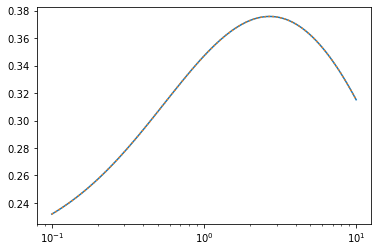

In [9]:
kon=10
koff=100

a1_0_1=kon
a1_0_2=kon
a1_0_3=kon
a1_0_4=kon
b1_1_1=koff
b1_1_2=koff
b1_1_3=koff
b1_1_4=koff

k_1_0=50
kr_1_0=100
k_2_0=1
k_3_0=1
k_4_0=1

k_1_1=k_1_0
kr_1_1=kr_1_0
k_2_1=k_2_0*40
k_3_1=k_3_0
k_4_1=k_4_0*0.005

for c,code in enumerate([Ccode, Ccode100]):
    print("##")

    parvalues=np.array([a1_0_1,k_1_0,kr_1_0,a1_0_2,k_2_0,a1_0_3,k_3_0,a1_0_4,k_4_0,b1_1_1,k_1_1,kr_1_1,b1_1_2,k_2_1,b1_1_3,k_3_1,b1_1_4,k_4_1])
    Avals=np.logspace(-1,1,100)
    ssvals=[]
    for A in Avals:
        rhos=code.interfacerhos(parvalues,np.array([A])) #returns the probability of each node even if it is called interfacerhos
        #print(rhos)
        ss=code.interfacess(parvalues,np.array([A]))
        #print(ss,end=",")
        ssvals.append(ss)
        pars=parvalues
        #print(k_4_0*rhos[6]+k_4_1*rhos[7])
    plt.plot(Avals,ssvals,linestyle=["-",":"][c])
    plt.xscale("log")
plt.show()

##
##


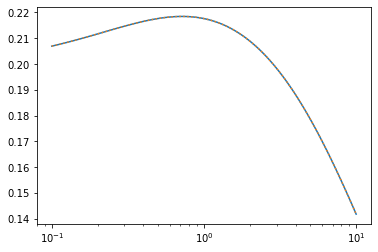

In [10]:
kon=10
koff=100

a1_0_1=kon
a1_0_2=kon
a1_0_3=kon
a1_0_4=kon
b1_1_1=koff
b1_1_2=koff
b1_1_3=koff
b1_1_4=koff

k_1_0=50
kr_1_0=100
k_2_0=1
k_3_0=1
k_4_0=1

k_1_1=k_1_0
kr_1_1=kr_1_0
k_2_1=k_2_0*0.005
k_3_1=k_3_0
k_4_1=k_4_0*40
    
parvalues=np.array([a1_0_1,k_1_0,kr_1_0,a1_0_2,k_2_0,a1_0_3,k_3_0,a1_0_4,k_4_0,b1_1_1,k_1_1,kr_1_1,b1_1_2,k_2_1,b1_1_3,k_3_1,b1_1_4,k_4_1])
Avals=np.logspace(-1,1,100)
for c,code in enumerate([Ccode, Ccode100]):
    print("##")
    ssvals=[]
    for A in Avals:
        rhos=Ccode.interfacerhos(parvalues,np.array([A])) #returns the probability of each node even if it is called interfacerhos
        #print(rhos)
        ss=Ccode.interfacess(parvalues,np.array([A]))
        #print(ss,end=",")
        ssvals.append(ss)
        pars=parvalues
        #print(k_4_0*rhos[6]+k_4_1*rhos[7])
    plt.plot(Avals,ssvals,linestyle=["-",":"][c])
    plt.xscale("log")
plt.show()

Now 2 sites, one for TF A and one for TF B (Fig. S7)

In [12]:

for prec in [50,100]:

    bsites=2
    nnodes_cycle=3
    TFnames=["A","B"]
    rev_cycle=[1]

    pars,nnodes,L_string,L_string_new,node_indices,transitions,alledges=write_multiplebsites.get_edges_anysites_anyTFs(sites=bsites,nnodes_cycle=nnodes_cycle,rev_cycle=rev_cycle,TFnames=TFnames)

    fname="./bin/bPcycle_%dbs_%dstates_rev%s_%s_prec%d.cpp"%(bsites,nnodes_cycle,"_".join(map(str,rev_cycle)),"_".join(TFnames),prec)

    file=fname
    objectnamemac=fname.replace(".cpp","")
    write_multiplebsites.write_pybind_module_highprecision(fname,pars,nnodes,TFnames,L_string_new,bsites,indicesC=node_indices,coeffsC=transitions,precision=prec)

    #compilestringmac="c++ -O2 -DNDEBUG -Wall -shared -std=c++11  -fPIC -undefined dynamic_lookup -lmpfr -lmpc -I %s  `python3 -m pybind11 --includes` %s -o %s`python3-config --extension-suffix`"%(path_to_eigen,file,objectnamemac)
    compilestringmac="c++ -O2 -DNDEBUG -Wall -shared -std=c++11  -fPIC -undefined dynamic_lookup -I %s -I /opt/homebrew/include -L /opt/homebrew/lib -lmpfr -lmpc `python3 -m pybind11 --includes` %s -o %s`python3-config --extension-suffix`"%(path_to_eigen,file,objectnamemac)


    !$compilestringmac

binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1], [1, 'a2_0-x', 3], [3, 'b2_2', 1], [2, 'a2_1-x', 4], [4, 'b2_1U2', 2], [3, 'a1_2-x', 4], [4, 'b1_1U2', 3]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 5], [5, 'kr_1_0', 1], [5, 'a1_0_2-A', 6], [5, 'k_2_0', 9], [9, 'a1_0_3-A', 10], [9, 'k_3_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1', 6], [6, 'kr_1_1', 2], [6, 'b1_1_2', 5], [6, 'k_2_1', 10], [10, 'b1_1_3', 9], [10, 'k_3_1', 2], [1, 'a2_0_1-B', 3], [5, 'a2_0_2-B', 7], [9, 'a2_0_3-B', 11], [3, 'b2_2_1', 1], [3, 'k_1_2', 7], [7, 'kr_1_2', 3], [7, 'b2_2_2', 5], [7, 'k_2_2', 11], [11, 'b2_2_3', 9], [11, 'k_3_2', 3], [2, 'a2_1_1-B', 4], [6, 'a2_1_2-B', 8], [10, 'a2_1_3-B', 12], [4, 'b2_1U2_1', 2], [4, 'k_1_1U2', 8], [8, 'kr_1_1U2', 4], [8, 'b2_1U2_2', 6], [8, 'k_2_1U2', 12], [12, 'b2_1U2_3', 10], [12, 'k_3_1U2', 4], [3, 'a1_2_1-A', 4], [7, 'a1_2_2-A', 8], [11, 'a1_2_3-A', 12], [4, 'b1_1U2_1', 3], [8, 'b1_1U2_2', 7], [12, 'b1_1U2_3', 11]]
number of nodes: 12
[9, 'k_3_0', 1]
[10, 'k_3_1', 2]
[11, 'k_3_

In file included from ./bin/bPcycle_2bs_3states_rev1_A_B_prec50.cpp:5:
In file included from /Users/rosamartinezcorral/miniconda3/envs/torchEnv/lib/python3.10/site-packages/pybind11/include/pybind11/eigen.h:12:
In file included from /Users/rosamartinezcorral/miniconda3/envs/torchEnv/lib/python3.10/site-packages/pybind11/include/pybind11/eigen/matrix.h:27:
In file included from /Users/rosamartinezcorral/Documents/eigen-3.4.0/Eigen/SparseCore:61:
/Users/rosamartinezcorral/Documents/eigen-3.4.0/Eigen/src/SparseCore/TriangularSolver.h:273:13: warning: variable 'count' set but not used [-Wunused-but-set-variable]
      Index count = 0;
            ^
6 warnings generated.
binding graph:
[[1, 'a1_0-x', 2], [2, 'b1_1', 1], [1, 'a2_0-x', 3], [3, 'b2_2', 1], [2, 'a2_1-x', 4], [4, 'b2_1U2', 2], [3, 'a1_2-x', 4], [4, 'b1_1U2', 3]]
alledges:
[[1, 'a1_0_1-A', 2], [1, 'k_1_0', 5], [5, 'kr_1_0', 1], [5, 'a1_0_2-A', 6], [5, 'k_2_0', 9], [9, 'a1_0_3-A', 10], [9, 'k_3_0', 1], [2, 'b1_1_1', 1], [2, 'k_1_1

In file included from ./bin/bPcycle_2bs_3states_rev1_A_B_prec100.cpp:5:
In file included from /Users/rosamartinezcorral/miniconda3/envs/torchEnv/lib/python3.10/site-packages/pybind11/include/pybind11/eigen.h:12:
In file included from /Users/rosamartinezcorral/miniconda3/envs/torchEnv/lib/python3.10/site-packages/pybind11/include/pybind11/eigen/matrix.h:27:
In file included from /Users/rosamartinezcorral/Documents/eigen-3.4.0/Eigen/SparseCore:61:
/Users/rosamartinezcorral/Documents/eigen-3.4.0/Eigen/src/SparseCore/TriangularSolver.h:273:13: warning: variable 'count' set but not used [-Wunused-but-set-variable]
      Index count = 0;
            ^
6 warnings generated.


In [13]:
#double check code

In [14]:
import basic
import bPcycle_2bs_3states_rev1_A_B_prec50 as Ccode_2
import bPcycle_2bs_3states_rev1_A_B_prec100 as Ccode_3

In [15]:
parvalues=[351.69320465658524,378.753535314951,351.69320465658524,16.768514631916794,351.69320465658524,2744.781879187902,1.0,480.07847428621443,1.0,3449.0597723044566,1.0,5282.878427302171,351.69320465658524,351.69320465658524,351.69320465658524,1.0,9734.294866511784,1.0,25.11397613601136,1.0,9077.081958940325,351.69320465658524,351.69320465658524,351.69320465658524,1.0,5107.186670398999,1.0,1737.086874220234,1.0,7179.980193121248,351.69320465658524,351.69320465658524,351.69320465658524,1.0,1.0,1.0]
len(parvalues)
parvalues.insert(2,0.1)
parvalues.insert(9,0.1)
parvalues.insert(19,0.1)
parvalues.insert(29,0.1)
parvalues=np.array(parvalues)

parvalues=np.array([200,1,10,200,10,200,10,200,10,1,200,1,200,10,200,200,200,200,10,1,200,1,200,10,200,200,200,200,10,1,200,1,200,10,200,200,200,200,200,200])


rhos_2=Ccode_2.interfacerhos(parvalues,np.array([3,12])) #returns the probability of each node even if it is called interfacerhos
print(rhos_2)
rhos_3=Ccode_3.interfacerhos(parvalues,np.array([3,12])) #returns the probability of each node even if it is called interfacerhos
print(rhos_3)

print(Ccode_2.interfacess(parvalues,np.array([3,12])))
print(Ccode_3.interfacess(parvalues,np.array([3,12])))
rhos=rhos_2
print(parvalues[6]*rhos[9-1]+parvalues[13]*rhos[10-1]+parvalues[23]*rhos[11-1]+parvalues[33]*rhos[12-1]) #check that the ss expression from the model is what we would expect

[0.0034413  0.01015031 0.04069688 0.12167564 0.01408138 0.04255657
 0.17005506 0.51090938 0.00170809 0.00498542 0.0200173  0.05972267]
[0.0034413  0.01015031 0.04069688 0.12167564 0.01408138 0.04255657
 0.17005506 0.51090938 0.00170809 0.00498542 0.0200173  0.05972267]
0.864334810014449
0.864334810014449
0.864334810014449


In [16]:
#Now manually construct laplacian and solve using python


pars_values=dict()
for pnum,par in enumerate(pars):
    pars_values[par]=parvalues[pnum]


L=np.zeros((12,12),dtype=object)

for edge in alledges:
    n0,par,n1=edge
    L[n1-1,n0-1]=par
for row in L:
    print("[%s],"%(",".join(map(str,row))).replace("-A","*A").replace("-B","*B"))

L_values=[]
for row in L:
    #print(row)
    newr=[]
    for term in row:
        if term==0:
            #print(".")
            newr.append(0)
        elif "A" in term:
            term_=term.replace("-A","") 
            newr.append(pars_values[term_]*3)
        elif "B" in term:
            term_=term.replace("-B","")
            newr.append(pars_values[term_]*12)
        else:
            newr.append(pars_values[term])
    #print(newr)
    L_values.append(np.array(newr))

 
        
L=np.vstack(L_values)
rhospy=basic.compute_ss_fromL(L) #this is called rhos but corresponds to the normalised rhos, i.e. steady-state probabilities
print(rhospy, np.sum(rhospy))
print(rhospy-rhos)

[0,b1_1_1,b2_2_1,0,kr_1_0,0,0,0,k_3_0,0,0,0],
[a1_0_1*A,0,0,b2_1U2_1,0,kr_1_1,0,0,0,k_3_1,0,0],
[a2_0_1*B,0,0,b1_1U2_1,0,0,kr_1_2,0,0,0,k_3_2,0],
[0,a2_1_1*B,a1_2_1*A,0,0,0,0,kr_1_1U2,0,0,0,k_3_1U2],
[k_1_0,0,0,0,0,b1_1_2,b2_2_2,0,0,0,0,0],
[0,k_1_1,0,0,a1_0_2*A,0,0,b2_1U2_2,0,0,0,0],
[0,0,k_1_2,0,a2_0_2*B,0,0,b1_1U2_2,0,0,0,0],
[0,0,0,k_1_1U2,0,a2_1_2*B,a1_2_2*A,0,0,0,0,0],
[0,0,0,0,k_2_0,0,0,0,0,b1_1_3,b2_2_3,0],
[0,0,0,0,0,k_2_1,0,0,a1_0_3*A,0,0,b2_1U2_3],
[0,0,0,0,0,0,k_2_2,0,a2_0_3*B,0,0,b1_1U2_3],
[0,0,0,0,0,0,0,k_2_1U2,0,a2_1_3*B,a1_2_3*A,0],
[0.0034413  0.01015031 0.04069688 0.12167564 0.01408138 0.04255657
 0.17005506 0.51090938 0.00170809 0.00498542 0.0200173  0.05972267] 1.0
[-6.45750814e-16 -1.89258331e-15 -7.50788320e-15 -2.23016050e-14
  1.03042574e-15  2.74086309e-15  1.06858966e-14  3.21964677e-14
 -3.80771803e-16 -8.41340886e-16 -3.19883009e-15 -9.74914593e-15]


The very small differences between the steady-state probabilities calculated using both methods shows it works well.